In [10]:
# The first thing to do is to import the relevant packages
# that I will need for my script, 
# these include the Numpy (for maths and arrays)
# and csv for reading and writing csv files
# If i want to use something from this I need to call 
# csv.[function] or np.[function] first

import csv as csv 
import numpy as np

test comment

In [11]:
import os
os.chdir('C:/LocalData/github/titanic')

In [12]:
# Open up the csv file in to a Python object
csv_file_object = csv.reader(open('csv/train.csv', 'rb'))
header = csv_file_object.next()  # The next() command just skips the 
                                 # first line which is a header
header

['PassengerId',
 'Survived',
 'Pclass',
 'Name',
 'Sex',
 'Age',
 'SibSp',
 'Parch',
 'Ticket',
 'Fare',
 'Cabin',
 'Embarked']

In [13]:
data=[]                          # Create a variable called 'data'.
for row in csv_file_object:      # Run through each row in the csv file,
    data.append(row)             # adding each row to the data variable
print data

[['1', '0', '3', 'Braund, Mr. Owen Harris', 'male', '22', '1', '0', 'A/5 21171', '7.25', '', 'S'], ['2', '1', '1', 'Cumings, Mrs. John Bradley (Florence Briggs Thayer)', 'female', '38', '1', '0', 'PC 17599', '71.2833', 'C85', 'C'], ['3', '1', '3', 'Heikkinen, Miss. Laina', 'female', '26', '0', '0', 'STON/O2. 3101282', '7.925', '', 'S'], ['4', '1', '1', 'Futrelle, Mrs. Jacques Heath (Lily May Peel)', 'female', '35', '1', '0', '113803', '53.1', 'C123', 'S'], ['5', '0', '3', 'Allen, Mr. William Henry', 'male', '35', '0', '0', '373450', '8.05', '', 'S'], ['6', '0', '3', 'Moran, Mr. James', 'male', '', '0', '0', '330877', '8.4583', '', 'Q'], ['7', '0', '1', 'McCarthy, Mr. Timothy J', 'male', '54', '0', '0', '17463', '51.8625', 'E46', 'S'], ['8', '0', '3', 'Palsson, Master. Gosta Leonard', 'male', '2', '3', '1', '349909', '21.075', '', 'S'], ['9', '1', '3', 'Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)', 'female', '27', '0', '2', '347742', '11.1333', '', 'S'], ['10', '1', '2', 'Nasser, 

In [14]:
data = np.array(data) 	         # Then convert from a list to an array
			         # Be aware that each item is currently
                                 # a string in this format
print data

[['1' '0' '3' ..., '7.25' '' 'S']
 ['2' '1' '1' ..., '71.2833' 'C85' 'C']
 ['3' '1' '3' ..., '7.925' '' 'S']
 ..., 
 ['889' '0' '3' ..., '23.45' '' 'S']
 ['890' '1' '1' ..., '30' 'C148' 'C']
 ['891' '0' '3' ..., '7.75' '' 'Q']]


In [15]:
print data[0]

['1' '0' '3' 'Braund, Mr. Owen Harris' 'male' '22' '1' '0' 'A/5 21171'
 '7.25' '' 'S']


In [16]:
# The size() function counts how many elements are in
# in the array and sum() (as you would expects) sums up
# the elements in the array.

number_passengers = np.size(data[0::,1])
number_passengers


891

In [17]:
number_survived = np.sum(data[0::,1].astype(np.float))
number_survived

342.0

In [18]:
proportion_survivors = number_survived / number_passengers
proportion_survivors

0.38383838383838381

In [32]:
women_only_stats = data[0::,4] == "female" # This finds where all 
                                           # the elements in the gender
                                           # column that equals “female”
men_only_stats = data[0::,4] != "female"   # This finds where all the 
                                           # elements do not equal 
                                           # female (i.e. male)

In [20]:
print women_only_stats[0:10]

[False  True  True  True False False False False  True  True]


In [33]:
# Using the index from above we select the females and males separately
women_onboard = data[women_only_stats,1].astype(np.float)     
men_onboard = data[men_only_stats,1].astype(np.float)

# Then we finds the proportions of them that survived
proportion_women_survived = \
                       np.sum(women_onboard) / np.size(women_onboard)  
proportion_men_survived = \
                       np.sum(men_onboard) / np.size(men_onboard) 

# and then print it out
print 'Proportion of women who survived is %s' % proportion_women_survived
print 'Proportion of men who survived is %s' % proportion_men_survived

Proportion of women who survived is 0.742038216561
Proportion of men who survived is 0.188908145581


In [36]:
test_file = open('csv/test.csv', 'rb')
test_file_object = csv.reader(test_file)
header = test_file_object.next()

In [37]:
prediction_file = open("csv/genderbasedmodel.csv", "wb")
prediction_file_object = csv.writer(prediction_file)
prediction_file_object.writerow(["PassengerId", "Survived"])
for row in test_file_object:       # For each row in test.csv
    if row[3] == 'female':         # is it a female, if yes then                                       
        prediction_file_object.writerow([row[0],'1'])    # predict 1
    else:                              # or else if male,       
        prediction_file_object.writerow([row[0],'0'])    # predict 0
test_file.close()
prediction_file.close()

In [21]:
header

['PassengerId',
 'Survived',
 'Pclass',
 'Name',
 'Sex',
 'Age',
 'SibSp',
 'Parch',
 'Ticket',
 'Fare',
 'Cabin',
 'Embarked']

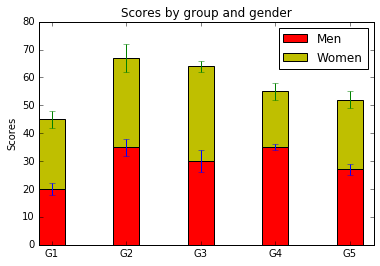

In [22]:
#!/usr/bin/env python
# a stacked bar plot with errorbars
%matplotlib inline

import matplotlib
import numpy as np
import matplotlib.pyplot as plt


N = 5
menMeans = (20, 35, 30, 35, 27)
womenMeans = (25, 32, 34, 20, 25)
menStd = (2, 3, 4, 1, 2)
womenStd = (3, 5, 2, 3, 3)
ind = np.arange(N)    # the x locations for the groups
width = 0.35       # the width of the bars: can also be len(x) sequence

p1 = plt.bar(ind, menMeans, width, color='r', yerr=menStd)
p2 = plt.bar(ind, womenMeans, width, color='y',
             bottom=menMeans, yerr=womenStd)

plt.ylabel('Scores')
plt.title('Scores by group and gender')
plt.xticks(ind + width/2., ('G1', 'G2', 'G3', 'G4', 'G5'))
plt.yticks(np.arange(0, 81, 10))
plt.legend((p1[0], p2[0]), ('Men', 'Women'))

plt.show()

In [23]:
help(plt.bar)

Help on function bar in module matplotlib.pyplot:

bar(left, height, width=0.8, bottom=None, hold=None, data=None, **kwargs)
    Make a bar plot.
    
    Make a bar plot with rectangles bounded by:
    
      `left`, `left` + `width`, `bottom`, `bottom` + `height`
            (left, right, bottom and top edges)
    
    Parameters
    ----------
    left : sequence of scalars
        the x coordinates of the left sides of the bars
    
    height : sequence of scalars
        the heights of the bars
    
    width : scalar or array-like, optional
        the width(s) of the bars
        default: 0.8
    
    bottom : scalar or array-like, optional
        the y coordinate(s) of the bars
        default: None
    
    color : scalar or array-like, optional
        the colors of the bar faces
    
    edgecolor : scalar or array-like, optional
        the colors of the bar edges
    
    linewidth : scalar or array-like, optional
        width of bar edge(s). If None, use default
      

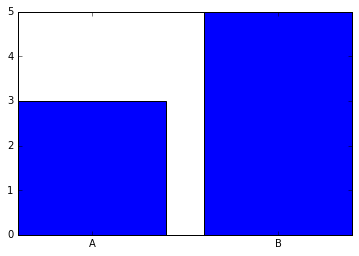

In [24]:
plt.bar(np.arange(2),(3,5),tick_label=("A","B"),align="center");

In [25]:
x = data[0::,4]
unique, counts = np.unique(x, return_counts=True)

print np.asarray((unique, counts)).T

[['female' '314']
 ['male' '577']]


In [28]:
unique.size

2

In [27]:
counts

array([314, 577], dtype=int64)

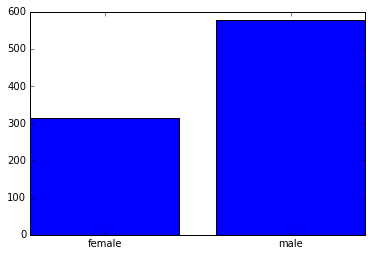

In [31]:
d = data[0::,4]
unique, counts = np.unique(d, return_counts=True)

n_bars = unique.size

plt.bar(np.arange(n_bars),counts,tick_label=unique,align="center");





Zweiter Teil Tutorial





In [38]:
np.unique(data[0::,(2,4)])

array(['1', '2', '3', 'female', 'male'], 
      dtype='|S82')

In [39]:
unique, counts = np.unique(data[0::,(2,4)], return_counts=True)
print unique
print counts

In [49]:
unique, counts = np.unique(zip(data[0::,2],data[0::,4]), return_counts=True)
print unique
print counts

['1' '2' '3' 'female' 'male']
[216 184 491 314 577]


In [50]:
zip((0,0,2,3),("a","a","c","d"))

[(0, 'a'), (0, 'a'), (2, 'c'), (3, 'd')]

In [53]:
unique, counts = np.unique(zip((0,0,2,3),("a","a","c","d")), return_counts=True)
print unique
counts

['0' '2' '3' 'a' 'c' 'd']


array([2, 1, 1, 2, 1, 1], dtype=int64)

In [54]:
import pandas as pd

Location = r'csv/train.csv'
df = pd.read_csv(Location)

In [55]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14,1,0,237736,30.0708,NaN,C


In [57]:
df.groupby(["Pclass"]).size()

Pclass
1    216
2    184
3    491
dtype: int64

In [58]:
data[5,]


array(['6', '0', '3', 'Moran, Mr. James', 'male', '', '0', '0', '330877',
       '8.4583', '', 'Q'], 
      dtype='|S82')

In [59]:
data[5,i]

NameError: name 'i' is not defined

In [60]:
survival_table = np.zeros((2, 3, 4))

In [61]:
survival_table[0,i,j]

NameError: name 'i' is not defined

In [62]:
for i in xrange(4):
    print i
    
print i

0
1
2
3
3


In [82]:
# So we add a ceiling
fare_ceiling = 40
# then modify the data in the Fare column to = 39, if it is greater or equal to the ceiling
data[ data[0::,9].astype(np.float) >= fare_ceiling, 9 ] = fare_ceiling - 1.0

fare_bracket_size = 10
number_of_price_brackets = fare_ceiling / fare_bracket_size

# I know there were 1st, 2nd and 3rd classes on board
number_of_classes = 3

# But it's better practice to calculate this from the data directly
# Take the length of an array of unique values in column index 2
number_of_classes = len(np.unique(data[0::,2])) 

# Initialize the survival table with all zeros
survival_table = np.zeros((2, number_of_classes, number_of_price_brackets))

In [83]:
for i in xrange(number_of_classes):       #loop through each class
    for j in xrange(number_of_price_brackets):   #loop through each price bin
        women_only_stats = data[(data[0::,4] == "female")&(data[0::,2].astype(np.float) == i+1)&(data[0:,9].astype(np.float)  >= j*fare_bracket_size)  &(data[0:,9].astype(np.float)   < (j+1)*fare_bracket_size)      , 1]                        #in the 2nd col                           

        men_only_stats = data[(data[0::,4] != "female")&(data[0::,2].astype(np.float)== i+1)&(data[0:,9].astype(np.float)  >= j*fare_bracket_size) &(data[0:,9].astype(np.float) < (j+1)*fare_bracket_size), 1] 
        
        survival_table[0,i,j] = np.mean(women_only_stats.astype(np.float)) 
        survival_table[1,i,j] = np.mean(men_only_stats.astype(np.float))

C:\Users\c124680\AppData\Local\Continuum\Anaconda2\lib\site-packages\numpy\core\_methods.py:59: RuntimeWarning: Mean of empty slice.
  warnings.warn("Mean of empty slice.", RuntimeWarning)


In [84]:
survival_table

array([[[        nan,         nan,  0.83333333,  0.97727273],
        [        nan,  0.91428571,  0.9       ,  1.        ],
        [ 0.59375   ,  0.58139535,  0.33333333,  0.125     ]],

       [[ 0.        ,         nan,  0.4       ,  0.38372093],
        [ 0.        ,  0.15873016,  0.16      ,  0.21428571],
        [ 0.11153846,  0.23684211,  0.125     ,  0.24      ]]])

In [85]:
survival_table != survival_table

array([[[ True,  True, False, False],
        [ True, False, False, False],
        [False, False, False, False]],

       [[False,  True, False, False],
        [False, False, False, False],
        [False, False, False, False]]], dtype=bool)

In [88]:
float('nan') == float('nan')

False

In [89]:
float("test")   

ValueError: could not convert string to float: test

In [90]:
try: 
    float("test")
except:
    print "no number"

no number


In [91]:
df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [92]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 90.5+ KB


In [93]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200
